In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t

# Настройка визуализации
sns.set(style="whitegrid")
# Please upload 'famcs_students.csv' to your Colab environment, for example, to /content/famcs_students.csv
df = pd.read_csv('/content/drive/MyDrive/famcs_students.csv')
df.head()

,cource,group,stream,sex,age,ss,interest,os,weekend_study,bad_sleep,...,social,sport,miss,study_form,foot_size,eye_color,score,retake,hostel,literature
0,4,11,Прикладная информатика,М,20.0,Нет,Математика,MacOS,Да,Да,...,Экстраверт,"Редко, легкая физкультура",3.0,Бюджет,48.0,Карие,9.2,0,"Нет, я из Минска",Да
1,4,11,Прикладная информатика,Ж,20.0,Нет,Программирование,MacOS,Нет,Нет,...,Экстраверт,"Да, я спортсмен",5.0,Бюджет,39.0,Зеленые,8.8,0,"Нет, я из Минска",Да
2,4,11,Прикладная информатика,Ж,19.0,Нет,Программирование,MacOS,Да,Нет,...,Экстраверт,Вообще нет,10.0,Бюджет,41.0,Карие,8.8,0,"Нет, я из Минска",Да
3,4,11,Прикладная информатика,Ж,20.0,Нет,Математика,MacOS,Да,Да,...,Экстраверт,"Да, я спортсмен",3.0,Бюджет,36.0,Карие,8.8,0,"Нет, я из Минска",Да
4,4,11,Прикладная информатика,М,20.0,Нет,Математика,Windows,Да,Нет,...,Интроверт,Вообще нет,1.0,Бюджет,46.0,Зеленые,9.0,0,"Нет, я из Минска",Да


In [5]:
from sklearn.model_selection import train_test_split

y = df["ss"]
X = df.drop("ss", axis=1)

X = pd.get_dummies(X, drop_first=True)

for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(np.float64)

X = X.astype(np.float64).to_numpy()

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y, shuffle=True
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (88, 45) (88,)
Validation: (19, 45) (19,)
Test: (20, 45) (20,)



Сравнение y_test и y_pred_dummy:
 0: 0 - 1
 1: 1 - 1
 2: 1 - 1
 3: 1 - 1
 4: 1 - 1
 5: 1 - 1
 6: 1 - 1
 7: 1 - 1
 8: 1 - 1
 9: 1 - 1
10: 1 - 1
11: 1 - 1
12: 1 - 1
13: 1 - 1
14: 0 - 1
15: 1 - 1
16: 1 - 1
17: 1 - 1
18: 1 - 1
19: 1 - 1
Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



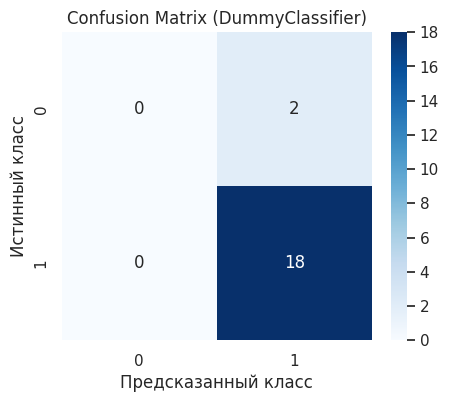

ROC-AUC: 0.5


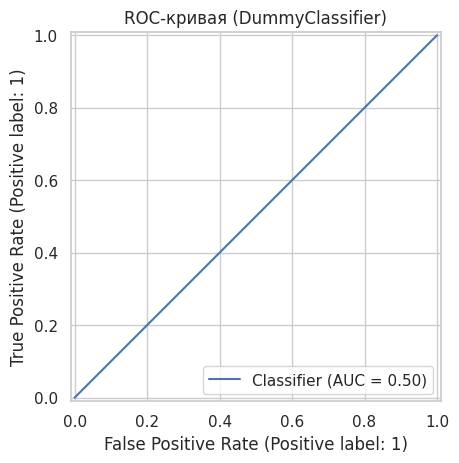

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val   = le.transform(y_val)
y_test  = le.transform(y_test)

dummy = DummyClassifier(strategy="most_frequent")

dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)

y_test_array = y_test

print("\nСравнение y_test и y_pred_dummy:")
for i, (true_label, pred_label) in enumerate(zip(y_test_array, y_pred_dummy)):
    print(f"{i:2d}: {true_label} - {pred_label}")

# --- Метрики ---
print("Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dummy, zero_division=0))

# --- Матрица ошибок ---
cm = confusion_matrix(y_test, y_pred_dummy)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.title("Confusion Matrix (DummyClassifier)")
plt.show()

# --- ROC-AUC ---
y_pred_probs = dummy.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_probs)
print("ROC-AUC:", roc_auc)

RocCurveDisplay.from_predictions(y_test, y_pred_probs)
plt.title("ROC-кривая (DummyClassifier)")
plt.show()


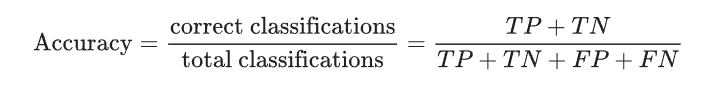
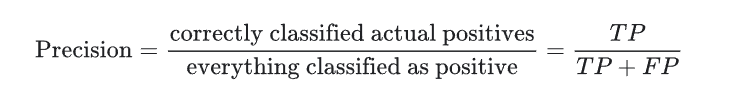
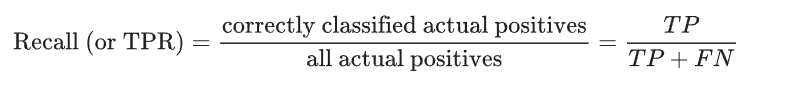

=== Самописный GaussianNB ===
Accuracy: 0.45

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.82      0.50      0.62        18

    accuracy                           0.45        20
   macro avg       0.41      0.25      0.31        20
weighted avg       0.74      0.45      0.56        20



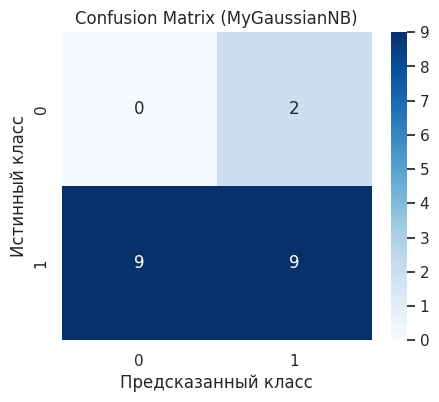


=== sklearn GaussianNB ===
Accuracy: 0.45

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.82      0.50      0.62        18

    accuracy                           0.45        20
   macro avg       0.41      0.25      0.31        20
weighted avg       0.74      0.45      0.56        20



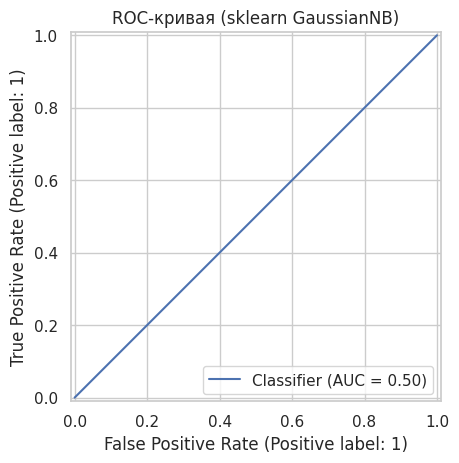

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class MyGaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = {}
        self.means = {}
        self.vars = {}

        for c in self.classes:
            X_c = X[y == c]
            self.class_priors[c] = X_c.shape[0] / X.shape[0]
            self.means[c] = X_c.mean(axis=0)
            self.vars[c] = X_c.var(axis=0)

    def _log_gaussian_prob(self, x, mean, var):
        eps = 1e-6  # сглаживание
        return -0.5 * np.log(2 * np.pi * (var + eps)) - ((x - mean)**2) / (2 * (var + eps))

    def predict(self, X):
        preds = []
        for x in X:
            posteriors = {}
            for c in self.classes:
                prior = np.log(self.class_priors[c])
                cond_probs = np.sum(self._log_gaussian_prob(x, self.means[c], self.vars[c]))
                posteriors[c] = prior + cond_probs
            preds.append(max(posteriors, key=posteriors.get))
        return np.array(preds)


# --- Самописный GaussianNB ---
my_nb = MyGaussianNB()
my_nb.fit(X_train, y_train)
y_pred_my_nb = my_nb.predict(X_test)

print("=== Самописный GaussianNB ===")
print("Accuracy:", accuracy_score(y_test, y_pred_my_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_my_nb, zero_division=0))

# Матрица ошибок
cm_my = confusion_matrix(y_test, y_pred_my_nb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_my, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.title("Confusion Matrix (MyGaussianNB)")
plt.show()

# ROC-AUC
sk_nb = GaussianNB()
sk_nb.fit(X_train, y_train)
y_pred_sk_nb = sk_nb.predict(X_test)

print("\n=== sklearn GaussianNB ===")
print("Accuracy:", accuracy_score(y_test, y_pred_sk_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_sk_nb, zero_division=0))

RocCurveDisplay.from_predictions(y_test, y_pred_probs)
plt.title("ROC-кривая (sklearn GaussianNB)")
plt.show()


k=1, accuracy=0.8947
k=2, accuracy=0.8947
k=3, accuracy=0.8421
k=4, accuracy=0.8421
k=5, accuracy=0.8947
k=6, accuracy=0.8947
k=7, accuracy=0.8947
k=8, accuracy=0.8947
k=9, accuracy=0.8947
k=10, accuracy=0.8947
k=11, accuracy=0.8947
k=12, accuracy=0.8947
k=13, accuracy=0.8947
k=14, accuracy=0.8947
k=15, accuracy=0.8947
k=16, accuracy=0.8947
k=17, accuracy=0.8947
k=18, accuracy=0.8947
k=19, accuracy=0.8947
k=20, accuracy=0.8947

Лучшее k: 1 с точностью 0.8947


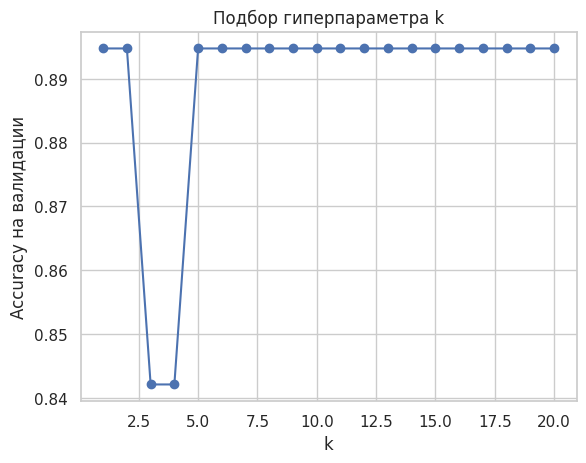


=== Самописный k-NN ===
Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.88      0.78      0.82        18

    accuracy                           0.70        20
   macro avg       0.44      0.39      0.41        20
weighted avg       0.79      0.70      0.74        20



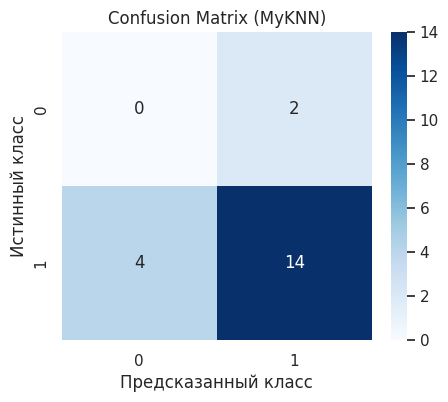


=== sklearn KNeighborsClassifier ===
Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.88      0.78      0.82        18

    accuracy                           0.70        20
   macro avg       0.44      0.39      0.41        20
weighted avg       0.79      0.70      0.74        20

ROC-AUC: 0.3888888888888889


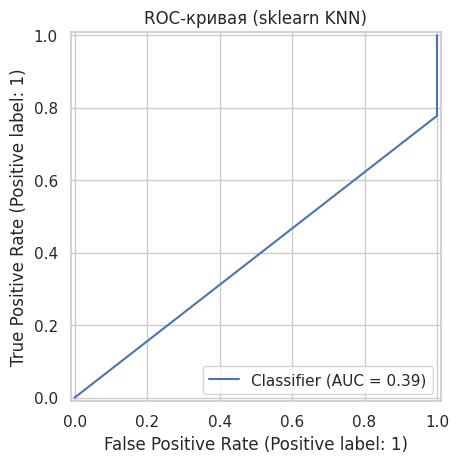

In [8]:
import numpy as np
from collections import Counter
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Реализация k-NN
class MyKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = np.array(y)

    def _distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def predict(self, X):
        preds = []
        for x in X:
            distances = [self._distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            preds.append(most_common)
        return np.array(preds)

# --- Подбор гиперпараметра k на валидационной выборке ---
best_k = None
best_acc = 0
acc_list = []

for k in range(1, 21):
    knn = MyKNN(k=k)
    knn.fit(X_train, y_train)
    y_pred_val = knn.predict(X_val)
    acc = accuracy_score(y_val, y_pred_val)
    acc_list.append(acc)
    print(f"k={k}, accuracy={acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_k = k

print(f"\nЛучшее k: {best_k} с точностью {best_acc:.4f}")

plt.plot(range(1, 21), acc_list, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy на валидации")
plt.title("Подбор гиперпараметра k")
plt.show()

knn_best = MyKNN(k=best_k)
knn_best.fit(X_train, y_train)
y_pred_test = knn_best.predict(X_test)

print("\n=== Самописный k-NN ===")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test, zero_division=0))

# Матрица ошибок
cm_my = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm_my, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.title("Confusion Matrix (MyKNN)")
plt.show()

# --- sklearn KNeighborsClassifier ---

sk_knn = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
sk_knn.fit(X_train, y_train)
y_pred_sk_knn = sk_knn.predict(X_test)

print("\n=== sklearn KNeighborsClassifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_sk_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_sk_knn, zero_division=0))


# --- ROC-AUC и ROC-кривая ---
y_pred_probs_sk = sk_knn.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_probs_sk)
print("ROC-AUC:", roc_auc)

RocCurveDisplay.from_predictions(y_test, y_pred_probs_sk)
plt.title("ROC-кривая (sklearn KNN)")
plt.show()


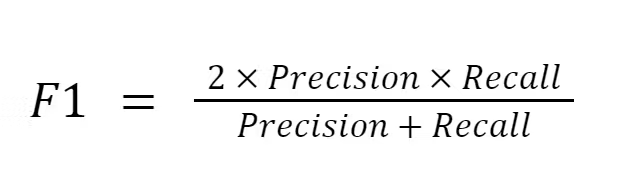

=== Самописная Logistic Regression ===
Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



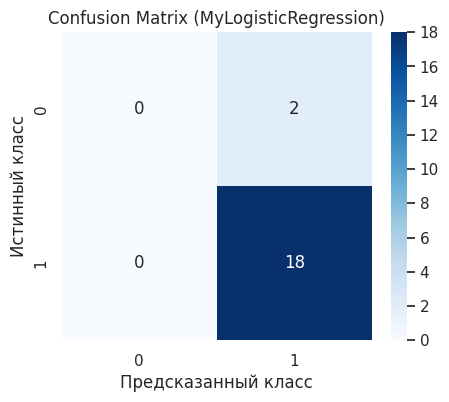

ROC-AUC (MyLogisticRegression): 0.5


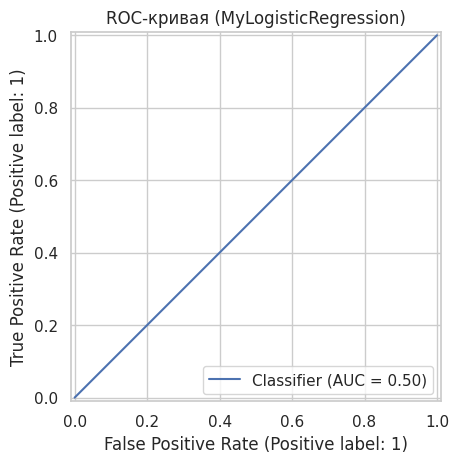


=== sklearn Logistic Regression ===
Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20

Лучший порог: 0.00, F1=0.9444


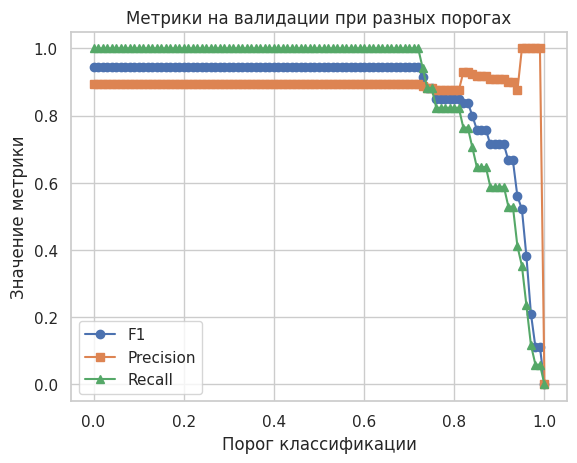


=== Метрики на тестовой выборке (с оптимальным порогом) ===
Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



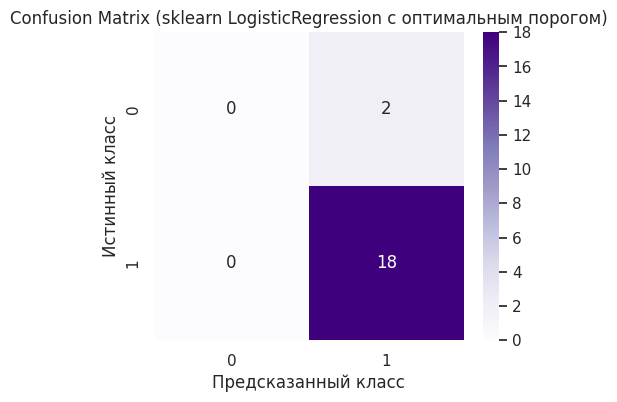

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report,
    precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, RocCurveDisplay
)
from sklearn.preprocessing import LabelEncoder


# --- Самописная логистическая регрессия ---
class MyLogisticRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        self.bias = 0
        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.theta) + self.bias
            y_pred = self._sigmoid(linear_model)
            dw = (1 / X.shape[0]) * np.dot(X.T, (y_pred - y))
            db = (1 / X.shape[0]) * np.sum(y_pred - y)
            self.theta -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.theta) + self.bias
        y_pred = self._sigmoid(linear_model)
        return np.where(y_pred >= 0.5, 1, 0)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.theta) + self.bias
        return self._sigmoid(linear_model)

# --- Обучение самописной модели ---
my_lr = MyLogisticRegression(lr=0.01, n_iter=1000)
my_lr.fit(X_train, y_train)
y_pred_my = my_lr.predict(X_test)
y_pred_probs_my = my_lr.predict_proba(X_test)

print("=== Самописная Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_my))
print("\nClassification Report:\n", classification_report(y_test, y_pred_my, zero_division=0))

# Матрица ошибок
cm_my = confusion_matrix(y_test, y_pred_my)
plt.figure(figsize=(5,4))
sns.heatmap(cm_my, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.title("Confusion Matrix (MyLogisticRegression)")
plt.show()

# ROC-AUC
roc_auc_my = roc_auc_score(y_test, y_pred_probs_my)
print("ROC-AUC (MyLogisticRegression):", roc_auc_my)
RocCurveDisplay.from_predictions(y_test, y_pred_probs_my)
plt.title("ROC-кривая (MyLogisticRegression)")
plt.show()

# --- sklearn LogisticRegression ---
sk_lr = LogisticRegression(max_iter=1000)
sk_lr.fit(X_train, y_train)
y_pred_sk = sk_lr.predict(X_test)
y_pred_probs_sk = sk_lr.predict_proba(X_test)[:, 1]

print("\n=== sklearn Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_sk))
print("\nClassification Report:\n", classification_report(y_test, y_pred_sk, zero_division=0))

# --- Подбор порога на валидации ---
y_val_probs = sk_lr.predict_proba(X_val)[:, 1]
thresholds = np.linspace(0, 1, 101)
metrics = []
best_t, best_f1 = 0.5, 0

for t in thresholds:
    y_val_pred = (y_val_probs >= t).astype(int)
    acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred, zero_division=0)
    rec = recall_score(y_val, y_val_pred, zero_division=0)
    f1 = f1_score(y_val, y_val_pred, zero_division=0)
    metrics.append((t, acc, prec, rec, f1))
    if f1 > best_f1:
        best_f1, best_t = f1, t

print(f"Лучший порог: {best_t:.2f}, F1={best_f1:.4f}")

# Визуализация метрик по порогам
plt.plot([m[0] for m in metrics], [m[4] for m in metrics], marker='o', label="F1")
plt.plot([m[0] for m in metrics], [m[2] for m in metrics], marker='s', label="Precision")
plt.plot([m[0] for m in metrics], [m[3] for m in metrics], marker='^', label="Recall")
plt.xlabel("Порог классификации")
plt.ylabel("Значение метрики")
plt.title("Метрики на валидации при разных порогах")
plt.legend()
plt.show()

# --- Оценка на тестовой выборке с оптимальным порогом ---
y_test_pred = (y_pred_probs_sk >= best_t).astype(int)
print("\n=== Метрики на тестовой выборке (с оптимальным порогом) ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred, zero_division=0))

cm_opt = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_opt, annot=True, fmt="d", cmap="Purples", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.title("Confusion Matrix (sklearn LogisticRegression с оптимальным порогом)")
plt.show()


In [10]:
print(y_pred_probs_my)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
